___

# Analysis of Data related to Salary and Education
In this era of technology , education in the correct way as well as in productive way can leads to successfulness of a human being which is being determined by his satisfaction and the work he is doing in his near future.

Thus, we need to found out the hidden patterns among the factors which would determine the salary of a person. There are various factors which will determine this factors like his education , working-hours , determination , etc..And we are going to do the  same in this analysis.

## **Extraction  of data was done by Barry Becker from the 1994 Census database. **

___

In [58]:
# importing libraries
import numpy as np #to do the numerical calculation
import pandas as pd # to explore and clean the data
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# a magic command to visualize the plots with in the Jupyter Notebook
%matplotlib inline 

___
Let's load our dataset  which we are going to explore and you can access it 
<a href='"https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'>here.</a>
___

In [59]:
# as our dataset don't have predefined column names , we have to specify them first
column_names = ['age',"workclass","fnlwgt","education","education-num","marital_status", "occupation","relationship","race",'sex',"capital-gain","capital-loss","hours-per-week","native-country","salary"]
# loading the data
df_adult = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names = column_names , index_col=False)

** Let's explore it by looking at it in tabular form.**

# Data Exploration

In [60]:
# print out 5 instances of data for exploration of data in tabular form
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
# gives dimensions of data
print(df_adult.shape)

(32561, 15)


Thus, we have **32561 rows**  and **15 columns ** in our data.

----
Now, we have to analyse our data in well mannered way.We have to look for how many **NaN values**  we have in our attribute columns.Identfying **NaN values ** is crucial for exploring the data further as the presence of NaN values don't let us do numerical calculation on various values and as well as we can't visualize our data if we have NaN values in our dataset.

In [62]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


___
This exploration let us reach at point where we can say there is no NaN values present in our whole data and this is a good news for us as we don't have to clean the data  any more.
___

It's time to explore our data using some mathematical calculations and **Descriptive Statistics** let us do it like a charm.

**Descriptive Statistics** gives us too much information about the distribution of numerical attributes present in our data as it let us know these following values--
1) Mean 

2) Standard Deviation (std)

3) Minimum and maximum values

In [63]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Visualization

Now, it's the right time to find out some patterns with in the attributes of our data.As we have loaded the data and also cleaned it.


The first thing we are going to do is finding out the **correlation coefficient ** between numerical factors.

Correlation coefficient gives us the value of correlation between two variables, it tells us how the value of one variable change on varying the value of another one .Range of correlation coefficient is ** -1 to 1**. If the value of one variable is increasing and with that increment if the value of another variable is also increasing, then we say they are **positively correlated** and vice-versa.

**The more the value of correlation-coefficient is closer to 1 , the more strongly correlated they are**

**Heatmap will help us to visualize Correlation coefficients within numerical factors present in our data.**

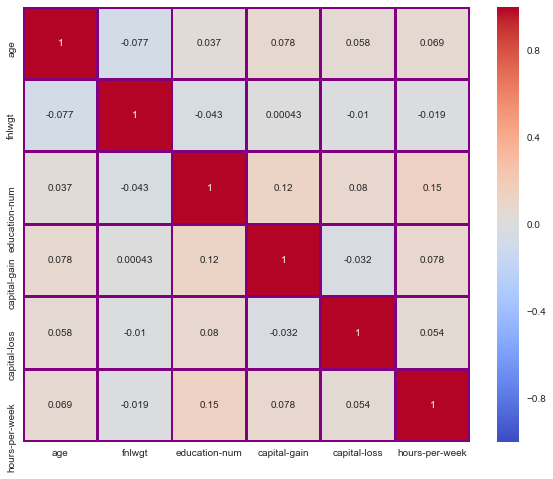

In [64]:
# gives correlation matrix
correlation = df_adult.corr() 
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot =True , cmap = "coolwarm" , linewidth=2 , linecolor="purple")
plt.show()

### Takeaway from Heatmap--
 As we can see there are no two such features in our data which are highly correlated.This tells us that there is very little linear relationship within the features of our data.

----
Before moving further, it will be a good choice to visualize the distribution of age of peoples we have in our dataset as it tells us about their work-experience and it gives us rough idea about the range  or distribution of **Age** of peoples.

** Let's do it with the help of Histogram.**

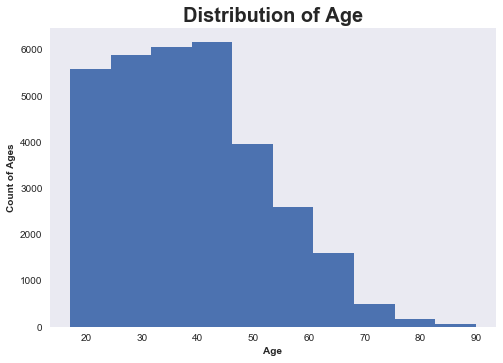

In [65]:
# changing the default style of Matplotlib to the seaborn style.
plt.style.use("seaborn")
fig,ax = plt.subplots()
ax.hist(df_adult['age'] ,bins= 10)
ax.set_xlabel("Age", weight = "bold" , fontsize = 10)
ax.set_ylabel("Count of Ages" , weight = "bold" , fontsize = 10)
ax.set_title("Distribution of Age" , weight = "bold" , fontsize = 20)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
plt.show()

### Conclusion From the visualization--
 Most of values within the age column are within the range of 20-50. Thus,we have the data about the younger population as well as about some experienced ones

-----
Now , we have enough information about Distribution of Ages but there are several other important features which can help us to
find out the hidden patterns with in our data and one  of such features is **Educational Categories.**

It's important to know about the education qualification pursued by them as it is one of the most important feature which decide the future of someone.

Let's visualize it using **Bar Chart**

In [66]:
education_cat = df_adult["education"].value_counts().index.tolist()
print(len(education_cat))
values_for_education_cat = df_adult['education'].value_counts().tolist()

16


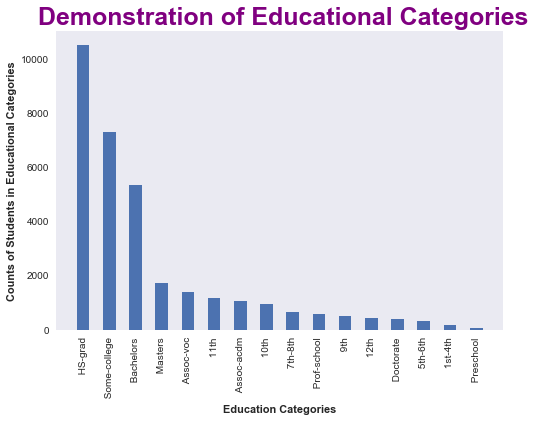

In [67]:
plt.style.use("seaborn")
fig,ax = plt.subplots()
bar_positions = np.linspace(1,32,16)
ax.bar(left = bar_positions , height =values_for_education_cat ,width = 1)
ax.set_xlabel("Education Categories", weight = "bold")
ax.set_ylabel("Counts of Students in Educational Categories" , weight = "bold")
ax.set_xticks(bar_positions)
ax.set_xticklabels(education_cat ,rotation = 90)
ax.set_title(" Demonstration of Educational Categories" , weight = "bold", fontsize = 25 , color ="purple")
ax.spines["top"].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)
plt.show()

### Takeaway from the distribution of Eduactional Categories
There are more peoples with **HS- grad ** qualification, followed by **Some-college** and then others with **Preschool ** qualification which have the least number of people counts.

___
Now , to explore the data further we have to see the relationships between various important attributes that can tell us a lot.t I think it's great time to analyse further that whether is there any correlation between age and working hours of a human being and we can do it by either **Scatter plot** or **joint plot**
I think Scatter plot can gives us the right information about whether these two attributes have correlation or not ?

**Let's visualize it.**

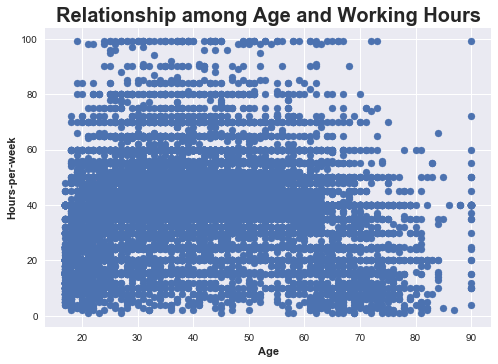

In [68]:
# creating figure and axes object simulatneously

fig , ax = plt.subplots()
ax.scatter(x = df_adult['age'] , y= df_adult["hours-per-week"] )
ax.set_xlabel("Age" , weight = "bold")
ax.set_ylabel("Hours-per-week" , weight="bold")
ax.set_title("Relationship among Age and Working Hours" , fontsize=20 , weight="bold")
plt.show()

It seems pretty awkawrd.Isn't it ? This visualization tells us that there is no correlation in between these attributes but wait we have to make sure it.** Mathematics and it's beauty helps us to do this **
### Let's find out the  value of correlation coefficient which tells us about how much these attributes correlate in a Mathematical Way
** The more the value of correlation coefficient, the stronger is the correlation**

In [69]:
from scipy.stats import pearsonr
r_value , p_value = pearsonr(df_adult['age'] , df_adult['hours-per-week'])
r_value , p_value

(0.068755707509557354, 2.011285562158478e-35)

As we can see from the calculated mathematical values too , there is no correlation between **Age and working hours** and it let us conclude that when we have passion for something, then age doesn't matter.

___
The following boxplot gives us little information but the valuable one and that is the variation or distribution of ** Males **  and ** Females** along with their **Ages** is almost same which implies **Equality.**

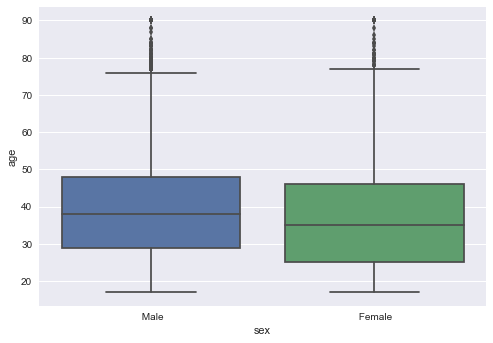

In [70]:
sns.boxplot(x="sex" , y ="age" , data = df_adult )
plt.show()

It's time to uncover remaining  important patterns with-in the data.

The most important pattern that can  be evaluated by finding out the hidden relationship for our main feature[**Salary**] is to know about the **Hard-work** a being is putting in order to live his/her to fullest.So, it becomes important to find out the distribution of **Hours-per-week** along with filtering by **Sex** feature.

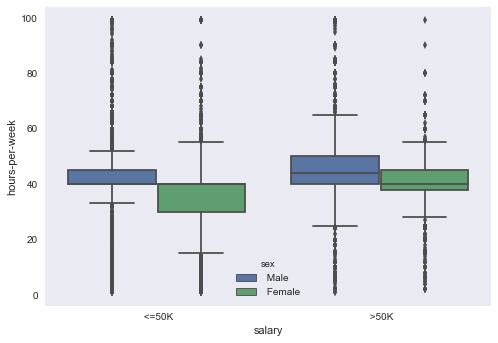

In [71]:
sns.boxplot( x = "salary" , y="hours-per-week" , data = df_adult , hue ="sex")
plt.grid(False)
plt.show()

### Takeaways from this visualization--
1) The left part of plot is showing the distribution for  peoples who earns less than 50K and for the number of hours they put in  thier work to earn that much. It is claerly seen that males work more than females but  at the same time precentage of females is greater than males.


2) The right part of plot is showing the the distribution for  peoples who earns more than 50K and for the number of hours they put in  thier work to earn high. It is claerly seen that they do more hard work than the peoples who earns less than 50K and this is the only reason they earn more. 

** More the hardwork = higher the pay **

---
Before completing our analysis , we should look whether the **marital-status** has some relation with salary or not ? Possibly, it can be one of the factors that don't let someone to put more efforts and on the other side it can also be oen of the factors that motivate someone to put more efforts for his/her family.

**Let's break it down using visualization.**

___

In [72]:
marital_status_cat = df_adult['marital_status'].value_counts().index
values_for_marital_cat = df_adult['marital_status'].value_counts()
less_than_50k = []
greater_than_50k =[]
for category in marital_status_cat:
    temp_counts = df_adult[(df_adult["marital_status"]== category)&(df_adult["salary"]==' <=50K')].shape[0]
    less_than_50k.append(temp_counts)
for category in marital_status_cat:
    temp_counts = df_adult[(df_adult["marital_status"]== category)&(df_adult["salary"]==' >50K')].shape[0]
    greater_than_50k.append(temp_counts)   

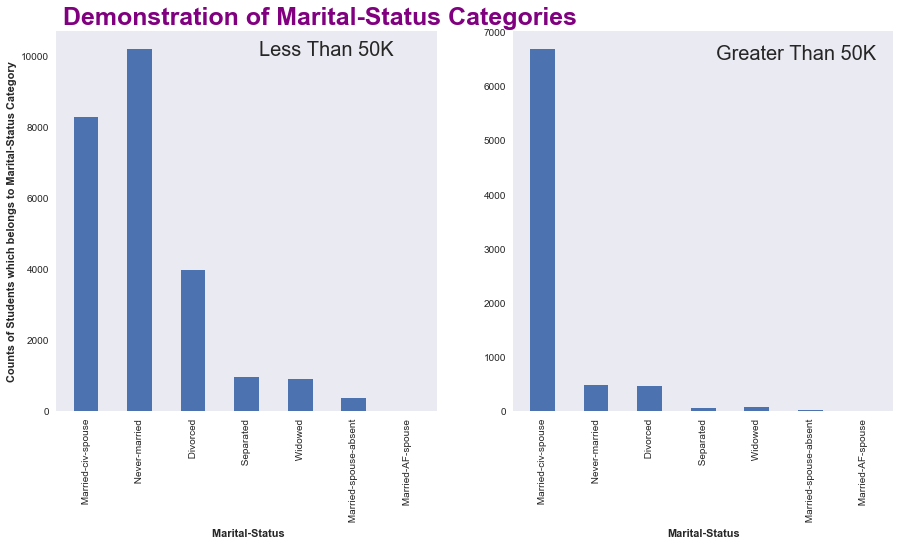

In [73]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
bar_positions = np.linspace(1,14,7)
ax1.bar(left = bar_positions , height =less_than_50k , width=1 , label="Less than 50k")
ax.legend(loc="best")
ax1.set_xlabel(" Marital-Status", weight = "bold")
ax1.set_ylabel("Counts of Students which belongs to Marital-Status Category" , weight = "bold")
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(marital_status_cat ,rotation = 90)
ax1.set_title(" Demonstration of Marital-Status Categories" , weight = "bold", fontsize = 25 , color ="purple", loc ="left")
ax1.spines["top"].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(False)
ax1.text(x = 8 , y=10000 , s ="Less Than 50K", fontsize = 20 )
ax2.bar(left = bar_positions , height =greater_than_50k  , width=1)
ax2.set_xlabel("Marital-Status", weight = "bold")
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(marital_status_cat ,rotation = 90)
ax2.spines["top"].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)
ax2.text(x =8, y=6500, s ="Greater Than 50K", fontsize = 20 )
plt.show()

### Takeaways--
* The number of **Married-civ-spouse** is more in both of the case i.e in greater than 50K as well as less than 50K
* These two plots looks similar except the case for **Never-Married**, as it is clear that who are unmarried are more likely to satisfy themselves in lower wages


## Let's do the same for Eduactional - Categories

In [74]:
greater_50k = []
lesser_50k =[]
for category in education_cat:
    counts = df_adult[(df_adult["education"] == category)&(df_adult['salary']==' <=50K')].shape[0]
    lesser_50k.append(counts)
for category in education_cat:
    counts = df_adult[(df_adult["education"] == category)&(df_adult['salary']==' >50K')].shape[0]
    greater_50k.append(counts)    

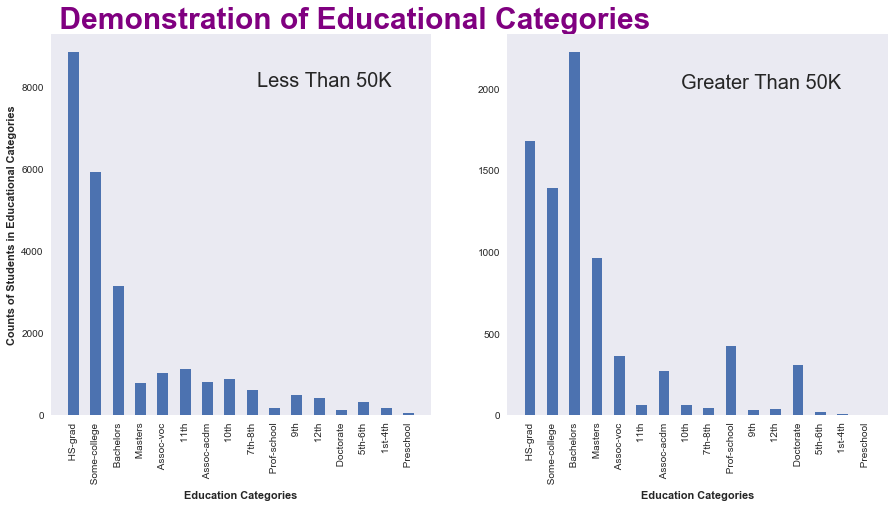

In [75]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
bar_positions = np.linspace(1,32,16)
ax1.bar(left = bar_positions , height =lesser_50k , width=1 , label="Less than 50k")
ax.legend(loc="best")
ax1.set_xlabel("Education Categories", weight = "bold")
ax1.set_ylabel("Counts of Students in Educational Categories" , weight = "bold")
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(education_cat ,rotation = 90)
ax1.set_title(" Demonstration of Educational Categories" , weight = "bold", fontsize = 30 , color ="purple", loc ="left")
ax1.spines["top"].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.grid(False)
ax1.text(x = 18 , y= 8000 , s ="Less Than 50K", fontsize = 20 )
ax2.bar(left = bar_positions , height =greater_50k  , width=1)
ax2.set_xlabel("Education Categories", weight = "bold")
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(education_cat ,rotation = 90)
ax2.spines["top"].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(False)
ax2.text(x = 15 , y= 2000 , s ="Greater Than 50K", fontsize = 20 )
plt.show()

## The major takeaways are -

1) The main point that we can extract from this plot is that they are more numbers of peoples who have their salary below 50K almost 3 times the peoples who have their salary greater than 50K.
 
 ** Counts of people(<=50K) = 3*counts of people(>50K)** (approax)

2) People with **Bachelors qualification** have the greatest number when it comes to salary(>50k) and on the other hand people with **High-School grad**  have the greatest number when it comes to salary(>50k)

3) People with higher qualification tends to have higher salary.

   ** Higher qualification can give you high pay **

# Conclusions :

* There are more chances of a human being to pursue **HS- grad**.
* Higher educational qualifictaion  can lead you to higher pay.
* The more hard you work , the higher your salary will be.

